In [3]:
%matplotlib notebook 
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, svm, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

In [4]:
df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]


forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True) #fill NaN values with -99999

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace = True)

35


In [5]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,-0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,0.346805,-0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,0.495942,0.476195,2774967.0,1026.550000


In [6]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

clf = LinearRegression(n_jobs = -1)  # n_jobs = -1 runs as many jobs as your processor can handle

clf.fit(X_train, y_train)

C:\Users\Emilio\AppData\Local\Temp/ipykernel_4000/996014618.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['label'],1))


LinearRegression(n_jobs=-1)

In [7]:
accuracy = clf.score(X_test, y_test) #test accuracy
print(accuracy)

0.976932471990411


In [8]:
for X,y in zip(X_test,y_test):
    print(f'Model: {clf.predict([X])[0]}, Actual: {y}')

Model: 356.04387310258187, Actual: 379.014982943214
Model: 89.9849175163099, Actual: 94.33119135089746
Model: 617.0369364559541, Actual: 545.25
Model: 101.11437717878908, Actual: 97.27527946887793
Model: 249.84051663480003, Actual: 240.89361551380287
Model: 815.3254454706491, Actual: 781.1
Model: 822.0792758289178, Actual: 778.22
Model: 586.6695753440124, Actual: 587.9
Model: 279.25049197139936, Actual: 262.45517397921697
Model: 268.55191320115796, Actual: 268.4637217907001
Model: 256.3471934507711, Actual: 240.9588167838774
Model: 1134.9617547909734, Actual: 1103.92
Model: 223.8893876191094, Actual: 223.14377345176865
Model: 257.87970742571036, Actual: 275.1443442321822
Model: 344.2964047180731, Actual: 349.85998425527447
Model: 609.8396582190675, Actual: 588.63
Model: 579.8177226026145, Actual: 545.78
Model: 53.16448586668071, Actual: 70.66814579615829
Model: 175.5599292102107, Actual: 155.81598903117455
Model: 84.696318570686, Actual: 99.10593051327805
Model: 252.67992006119684, Act

In [9]:
forecast_set = clf.predict(X_lately)   #prediction
print(forecast_set, accuracy, forecast_out)

[1077.2496461  1091.75510854 1105.69028689 1100.01141085 1093.4800976
 1090.92468897 1089.29889795 1086.20196932 1080.13416961 1075.81814272
 1073.46293015 1093.80305819 1112.1568283  1116.03196688 1131.0104181
 1134.96175479 1133.27435279 1131.00795434 1132.66075348 1151.76335042
 1150.53677991 1160.23537253 1156.77553562 1164.69497833 1185.67912899
 1197.4313911  1191.59433096 1203.5391588  1208.89433753 1207.43399426
 1198.19223105 1203.42184751 1202.38169831 1137.6733803  1085.3989861 ] 0.976932471990411 35


In [10]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

<IPython.core.display.Javascript object>


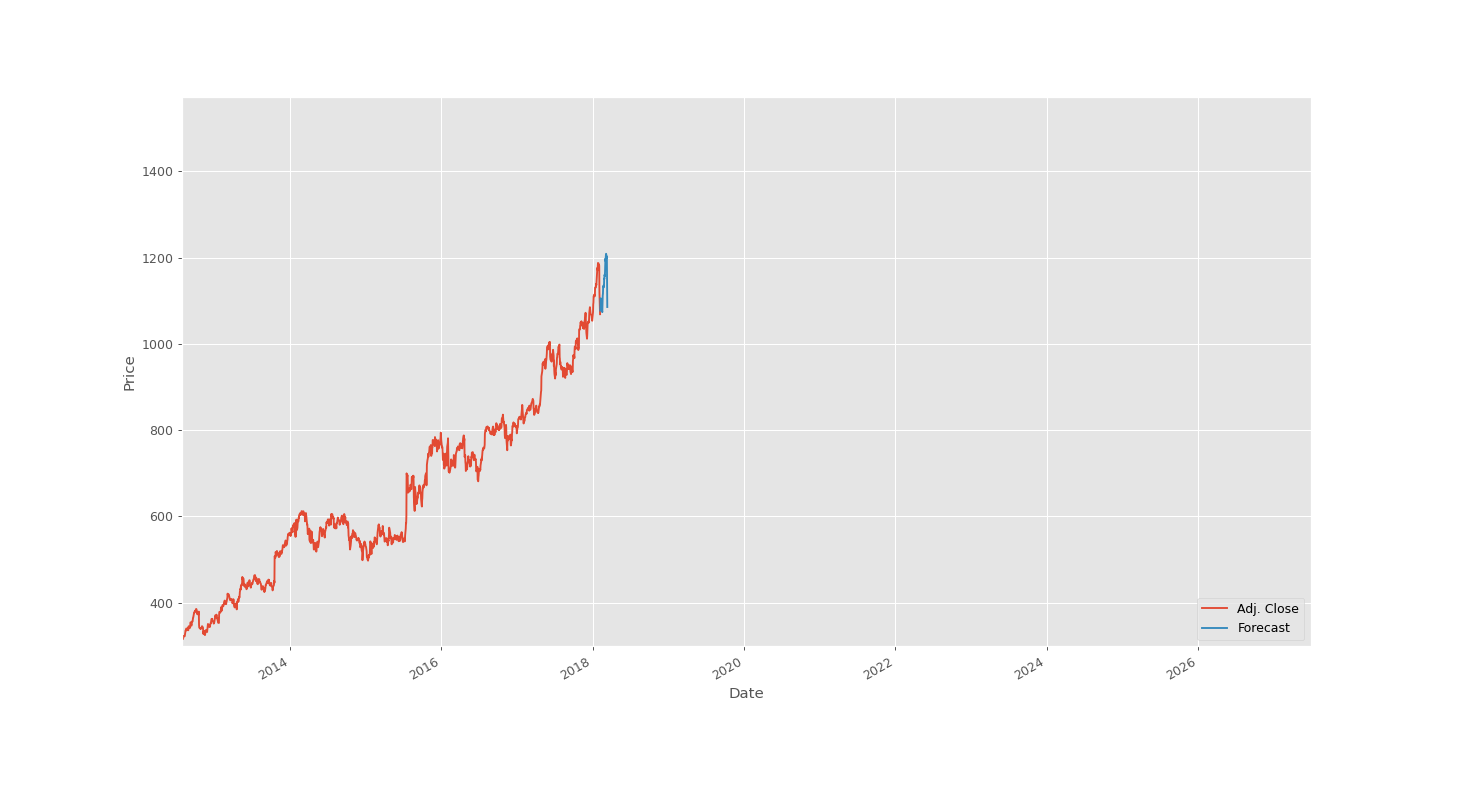

In [11]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')

fig = plt.gcf()
fig.set_size_inches(18, 10)

plt.show()

In [115]:
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) #test accuracy
print(accuracy)
for X,y in zip(X_test,y_test):
    print(f'Model: {clf.predict([X])[0]}, Actual: {y}')

0.8127317954001767
Model: 676.1211008018755, Actual: 1119.2
Model: 735.5223793600511, Actual: 959.9
Model: 291.2923672702375, Actual: 337.8278421853679
Model: 215.0515397824933, Actual: 90.25861971239635
Model: 715.1018749513012, Actual: 805.59
Model: 476.6677463354749, Actual: 532.2
Model: 189.54165544687433, Actual: 154.82793901542982
Model: 273.00245279036994, Actual: 243.5116972814107
Model: 298.5624057153991, Actual: 143.2672522829852
Model: 344.9361031356989, Actual: 371.1406757111368
Model: 372.02009449930193, Actual: 333.96592080403065
Model: 274.2961447149663, Actual: 338.9312482943214
Model: 327.42042460961665, Actual: 281.39865067702317
Model: 602.0162202229743, Actual: 522.97
Model: 295.98249083562365, Actual: 270.1138154718169
Model: 386.11899506761745, Actual: 408.6153564605857
Model: 707.8383597975865, Actual: 759.28
Model: 338.89009343500396, Actual: 302.9351317308702
Model: 238.75586382277294, Actual: 224.3074155033064
Model: 308.10549929941385, Actual: 306.45600031489

Model: 707.9786703016576, Actual: 764.32
Model: 236.0961496489806, Actual: 146.62762543297995
Model: 425.8255397966107, Actual: 401.95078356250656
Model: 361.86198243782553, Actual: 327.15489582239945
Model: 586.0198932957625, Actual: 538.77
Model: 193.93046606082203, Actual: 195.8044295161121
Model: 689.6654100873668, Actual: 948.09
Model: 577.7776301484352, Actual: 545.78
Model: 230.54282502461012, Actual: 275.6007531227039
Model: 737.0590877100506, Actual: 852.57
Model: 235.41798972173882, Actual: 214.07081610160597
Model: 287.2808834726654, Actual: 305.11686653721006
Model: 271.7021764924031, Actual: 223.16388553584548
Model: 378.33155597597295, Actual: 397.672577149155
Model: 207.16196951286256, Actual: 161.1574776949722
Model: 350.44272545465304, Actual: 101.66884197543823
Model: 557.5608100264266, Actual: 552.51
Model: 707.818942366496, Actual: 1070.85
Model: 256.8801297689906, Actual: 246.42870179489873
Model: 249.88442234389714, Actual: 249.545322504461
Model: 302.563804248393